<a href="https://colab.research.google.com/github/xiaoyi-yuxiao/revert-code-to-python/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

define a balanced binary tree

In [0]:
class Binode(object):
  
  def __init__(self,element=None,down=None,up=None):
    self.element = element
    self.up = up
    self.down = down

  def dict_form(self):
    dict_data = {'up':self.up,'down':self.down,'element':self.element}
    return dict_data

class Tree(object):

  def __init__(self,root=None):
    self.root = root

#add node from bottom up
  def add_node(self,element):
    new_node = Binode(element)
    if self.root == None:
      self.root = new_node
    else:
      node_queue = list()
      node_queue.append(self.root)
      while len(node_queue):
        cur_node = node_queue.pop(0)
        if cur_node.down == None:
          cur_node.down = new_node
        elif cur_node.up == None:
          cur_node.up = new_node
        else:
          node_queue.append(curnode.down)
          node_queue.append(curnode.up)

Find position for each node

In [0]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, leaf_vs_root_factor = 0.5):

    if not nx.is_tree(G):
        raise TypeError('Need to define a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, leftmost, width, leafdx = 0.2, vert_gap = 0.2, vert_loc = 0, 
                    xcenter = 0.5, rootpos = None, 
                    leafpos = None, parent = None):

        if rootpos is None:
            rootpos = {root:(xcenter,vert_loc)}
        else:
            rootpos[root] = (xcenter, vert_loc)
        if leafpos is None:
            leafpos = {}
        children = list(G.neighbors(root))
        leaf_count = 0
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)  
        if len(children)!=0:
            rootdx = width/len(children)
            nextx = xcenter - width/2 - rootdx/2
            for child in children:
                nextx += rootdx
                rootpos, leafpos, newleaves = _hierarchy_pos(G,child, leftmost+leaf_count*leafdx, 
                                    width=rootdx, leafdx=leafdx,
                                    vert_gap = vert_gap, vert_loc = vert_loc-vert_gap, 
                                    xcenter=nextx, rootpos=rootpos, leafpos=leafpos, parent = root)
                leaf_count += newleaves

            leftmostchild = min((x for x,y in [leafpos[child] for child in children]))
            rightmostchild = max((x for x,y in [leafpos[child] for child in children]))
            leafpos[root] = ((leftmostchild+rightmostchild)/2, vert_loc)
        else:
            leaf_count = 1
            leafpos[root]  = (leftmost, vert_loc)
#        pos[root] = (leftmost + (leaf_count-1)*dx/2., vert_loc)
#        print(leaf_count)
        return rootpos, leafpos, leaf_count

    xcenter = width/2.
    if isinstance(G, nx.DiGraph):
        leafcount = len([node for node in nx.descendants(G, root) if G.out_degree(node)==0])
    elif isinstance(G, nx.Graph):
        leafcount = len([node for node in nx.node_connected_component(G, root) if G.degree(node)==1 and node != root])
    rootpos, leafpos, leaf_count = _hierarchy_pos(G, root, 0, width, 
                                                    leafdx=width*1./leafcount, 
                                                    vert_gap=vert_gap, 
                                                    vert_loc = vert_loc, 
                                                    xcenter = xcenter)
    pos = {}
    for node in rootpos:
        pos[node] = (leaf_vs_root_factor*leafpos[node][0] + (1-leaf_vs_root_factor)*rootpos[node][0], leafpos[node][1]) 
#    pos = {node:(leaf_vs_root_factor*x1+(1-leaf_vs_root_factor)*x2, y1) for ((x1,y1), (x2,y2)) in (leafpos[node], rootpos[node]) for node in rootpos}
    xmax = max(x for x,y in pos.values())
    for node in pos:
        pos[node]= (pos[node][0]*width/xmax, pos[node][1])
    return pos

real test

In [0]:
#K = {'layer0':[1],'layer1':[2,3],'layer2':[4,5,6]}

In [0]:
def construct_node(initial_price,N,u,d):
  
#define a dict contains first layer [layer0:initial price]
  list_node = {'layer0':[initial_price]}
#set a for loop to from 1 to N-1
  for layer in range(1,N+1):
#construct a layer in each loop
    cur_layer = list()
    prev_layer = list_node['layer'+str(layer-1)]
    for ele in range(len(prev_layer)):
      cur_layer.append(round(u*prev_layer[ele],10))
      cur_layer.append(round(d*prev_layer[ele],10))

    cur_layer = unique(cur_layer)
    dict_data = {'layer'+str(layer):cur_layer}
    list_node.update(dict_data)
  
  return list_node
#store cur-1 layer 
#for each ele in cur-1 layer, update value in cur layer

In [0]:
def coordinate_pos(node_list):

  position = {}
  for layer in range(len(node_list)):
    cur_layer = node_list['layer'+str(layer)]

    for element in range(len(cur_layer)):
      ele_tuple = (layer, -1*layer+2*element) #ele*2 for the gap between up and down is 2
      dict_data = {cur_layer[element]:ele_tuple}
      position.update(dict_data)

  return position


In [0]:
def connect_graph(node_list):
#set a for loop from 0 to n-1
  G = nx.Graph()
  for layer in range(len(node_list)-1):
#store layer current and layer next
    cur_layer = node_list['layer'+str(layer)]
    nxt_layer = node_list['layer'+str(layer+1)]
#for each ele in current layer, add_edge to ele on next layer and next ele on next layer
    for ele in range(len(cur_layer)):
      G.add_edge(cur_layer[ele],nxt_layer[ele])
      G.add_edge(cur_layer[ele],nxt_layer[ele+1])
  return G

In [0]:
test = construct_node(1,9,1.2,0.8) #u*d!=1

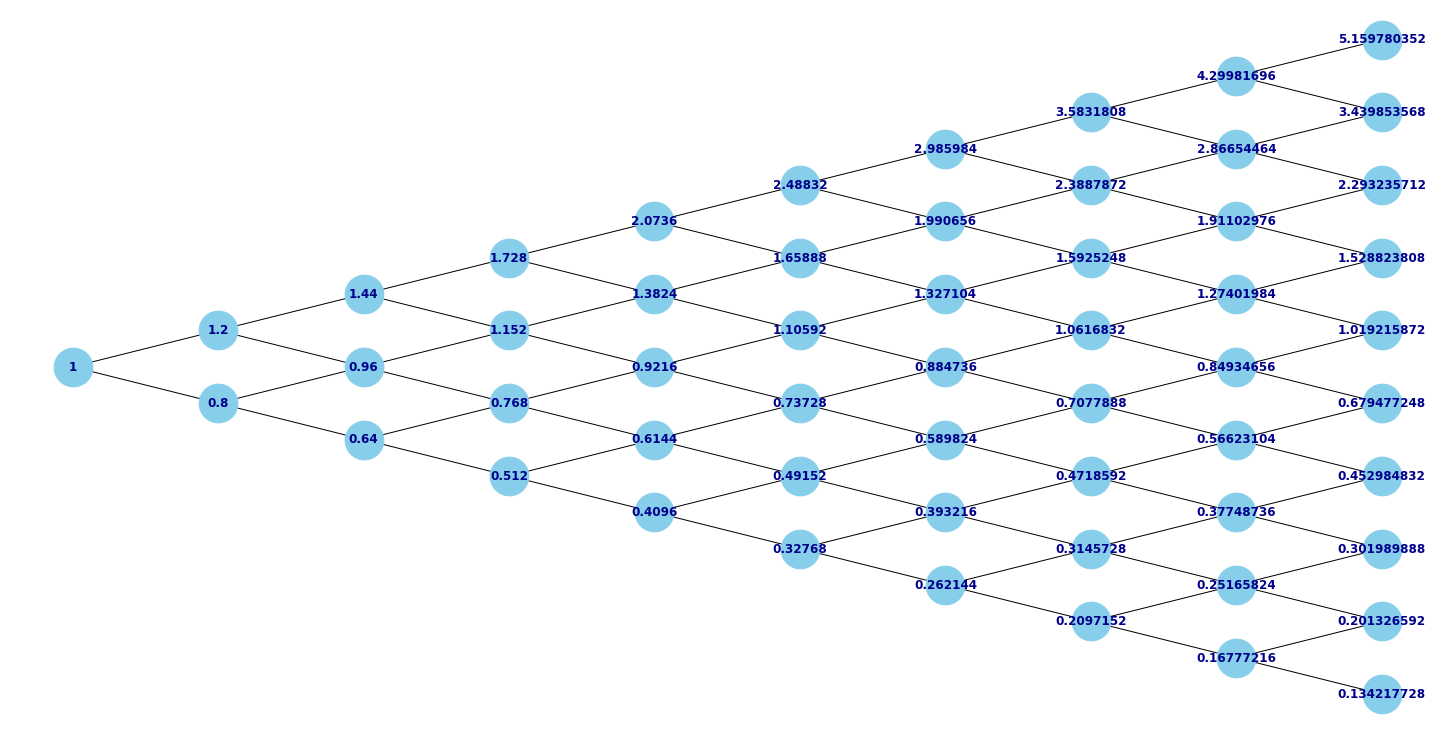

In [269]:
plt.figure(figsize=(20,10))
pos = coordinate_pos(test)
G = connect_graph(test)
#change color if you want, i don't have art talent
nx.draw(G,pos=pos,with_labels=True,node_color='skyblue',node_size=1500,node_shape='o',alpha=1,font_weight="bold",font_color='darkblue',fontsize=12)
plt.show()

using back_propagation to calculate call/put option price